# <div> <center> <b> NN Arabic Handwriting Recognition </b> </center> </div>

## <b> Credentials: </b> (E-JUST Submission)
- Name: Yousef Ibrahim Gomaa Mahmoud
- ID: 320210207
- Group: 1
- Section: AID 3

## <b> Notebook Workflow: </b>
- Environment Setup
- Data Pre-processing
- Data Visualization
- Model Definition
- Training the Model
- Prediction

## <b> Introduction: </b>
<p> In this notebook, a model is to be trained to <b> recognize/classify arabic letters </b> using a convolutional neural network (CNN) through Keras, a TensorFlow tool. </p>

## <b> Dataset: </b>
https://www.kaggle.com/competitions/arabic-letters-classification

## Environment Setup:
### Importing Packages

In [205]:
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

### GPU Checkup:
Kaggle provides 2 GPUs which are relied upon heavily during the training phase.

In [132]:
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

: /physical_device:CPU:0
: /physical_device:GPU:0
: /physical_device:GPU:1


### Loading the Dataset(s):

In [133]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test']
NUM_CLASS = 65
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64
SEED = 43
LABEL_NAMES = [i for i in range(NUM_CLASS)]

- There are 65 classes to classify into (0-64)
- Images must be resized to a consistent size in order to train properly.

In [134]:
# str = "user001_heh_middle_042.png"
# str[8:18]

## Data Pre-processing:
Splitting training data into 'Training' and 'Validation' for the model to train on.

In [135]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode="grayscale",
    label_mode="categorical",
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [136]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode="grayscale",
    label_mode="categorical",
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


Labels/class_names are labelled after the folders they were initially in.

In [137]:
class_names = train_images.class_names
class_names.count()
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


## Data Visualization:

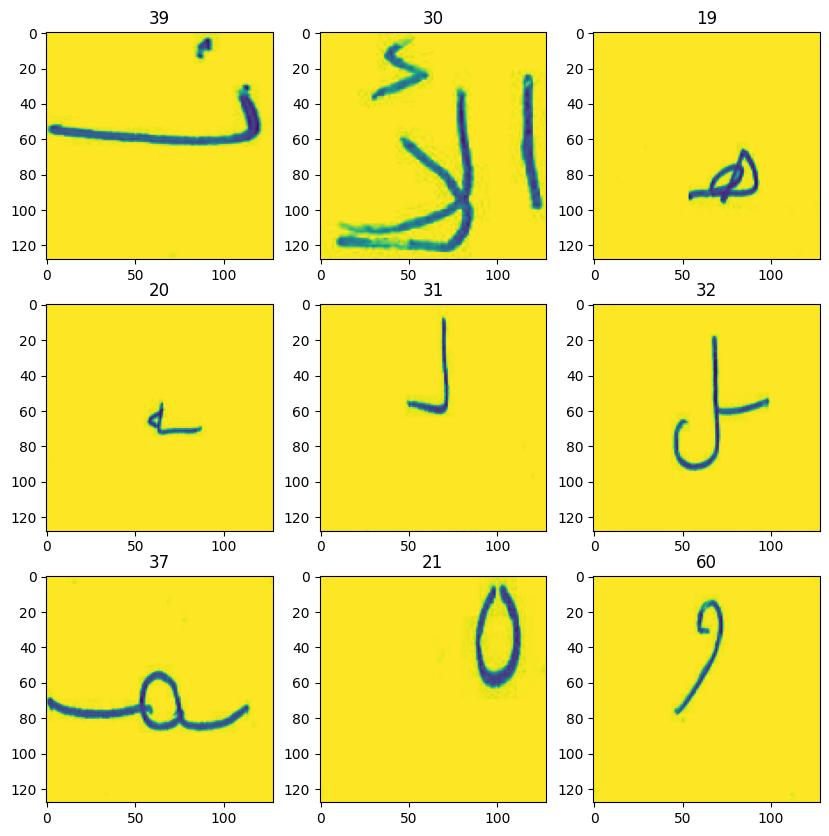

In [149]:
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])

In [150]:
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break

(64, 128, 128, 1)
(64, 65)


- (Batch Size, Width, Height, 1-Dimensional (Greyscale))
- (Batch Size, Number of Classes)

## Model Definition:

In [156]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(NUM_CLASS, activation=tf.nn.softmax)
])

### Model Summary:

In [157]:
model.build(input_shape=(None, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_18 (Rescaling)    (None, 128, 128, 1)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_49 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_22 (Flatten)        (None, 246016)          

### Model Optimization:

In [158]:
model.compile(optimizer = Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

## Training the Model:

In [159]:
model.fit(train_images, validation_data=train_validation, epochs=50)

Epoch 1/50
532/532 [==============================] - 41s 70ms/step - loss: 4.1499 - accuracy: 0.0399 - val_loss: 4.2824 - val_accuracy: 0.0385
Epoch 2/50
532/532 [==============================] - 37s 69ms/step - loss: 2.9648 - accuracy: 0.2246 - val_loss: 13.7323 - val_accuracy: 0.0389
Epoch 3/50
532/532 [==============================] - 38s 71ms/step - loss: 1.9079 - accuracy: 0.4524 - val_loss: 51.7720 - val_accuracy: 0.0250
Epoch 4/50
532/532 [==============================] - 37s 69ms/step - loss: 1.0780 - accuracy: 0.6683 - val_loss: 33.1696 - val_accuracy: 0.0429
Epoch 5/50
532/532 [==============================] - 38s 70ms/step - loss: 0.5775 - accuracy: 0.8184 - val_loss: 177.4207 - val_accuracy: 0.0214
Epoch 6/50
532/532 [==============================] - 37s 69ms/step - loss: 0.3656 - accuracy: 0.8904 - val_loss: 105.9089 - val_accuracy: 0.0309
Epoch 7/50
532/532 [==============================] - 37s 69ms/step - loss: 0.2721 - accuracy: 0.9200 - val_loss: 108.5459 - val_

### Saving the Model:

Keras format:

In [160]:
model.save('nn-arabic-handwriting-320210207.keras')

H5 (LEGACY) format:

In [161]:
model.save('nn-arabic-handwriting-320210207.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction:

Loading the 'Test' dataset:

In [197]:
test_images = tf.keras.utils.image_dataset_from_directory(
    datasets[1],
    labels=None,
    color_mode="grayscale",
    label_mode="categorical",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False)

Found 10640 files belonging to 1 classes.


In [198]:
predictions = model.predict(test_images)

167/167 [==============================] - 5s 32ms/step


## Making 'predictions.csv':

In [248]:
df_predictions = pd.DataFrame(columns=['Image','Label'], dtype=(np.int32,np.int32))

In [250]:
df_predictions.dtypes

Image    int32
Label    int32
dtype: object

In [251]:
img_list = os.listdir('/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test')
predictions_mod = np.argmax(predictions, axis=1)

for idx, image in enumerate(img_list):
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(predictions_mod[idx])]], columns=['Image','Label'])
    df_predictions = pd.concat([df_predictions, df2])

In [276]:
df_predictions.head()

,Image,Label
0,0,22
0,1,24
0,2,22
0,3,22
0,4,24


In [277]:
df_predictions.sort_values(by='Image', inplace=True)

In [278]:
df_predictions.reset_index(drop=True)

,Image,Label
0,0,22
1,1,24
2,2,22
3,3,22
4,4,24
...,...,...
10635,10635,16
10636,10636,22
10637,10637,22
10638,10638,22


In [280]:
df_predictions.sample(5)

,Image,Label
0,6755,22
0,1834,16
0,4070,22
0,5771,36
0,5694,24


In [282]:
df_predictions.to_csv('predictions.csv', index=False, header=False) 